In [1]:
import requests
import pandas as pd

In [7]:
def get_historic_price(symbol, exchange = 'bitfinex', after = '2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{sybmol}usd/ohlc'.format(sybmol = symbol, exchange = exchange)
    resp = requests.get(url, params = { 'periods': '3600',
                                       'after':str(int(pd.Timestamp(after).timestamp()))
                                      })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=
        ['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA']
                     )
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit = 's')
    df.set_index('CloseTime', inplace = True)
    return df

In [5]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2023-06-25 23:44:29.639618')

In [8]:
btc = get_historic_price('btc', 'bitstamp', after = last_week)

In [9]:
eth = btc = get_historic_price('eth', 'bitstamp', after = last_week)

In [18]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,166.000000,166.000000,166.000000,166.000000,166.000000,1.660000e+02
mean,1883.657831,1889.257831,1877.611446,1883.761446,204.970250,3.862841e+05
std,30.102987,29.764331,30.504212,30.075107,319.901497,6.023548e+05
min,1827.800000,1833.600000,1816.500000,1827.800000,12.388000,2.369392e+04
25%,1857.625000,1863.075000,1850.475000,1857.900000,52.155530,9.960718e+04
50%,1881.600000,1889.500000,1874.200000,1881.150000,96.596795,1.851741e+05
75%,1915.150000,1918.800000,1912.125000,1915.200000,208.842163,3.875259e+05
max,1934.900000,1945.500000,1930.900000,1934.700000,2291.847102,4.326788e+06


In [10]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-06-26 00:00:00,1900.7,1903.0,1898.2,1899.9,58.195463,1.105940e+05
2023-06-26 01:00:00,1899.9,1905.1,1889.6,1889.6,129.824401,2.464310e+05
2023-06-26 02:00:00,1889.0,1889.0,1866.3,1876.5,589.188872,1.105904e+06
2023-06-26 03:00:00,1876.3,1879.7,1872.5,1879.2,188.799185,3.540975e+05
2023-06-26 04:00:00,1879.0,1881.6,1875.3,1880.9,108.886935,2.045277e+05


<AxesSubplot:xlabel='CloseTime'>

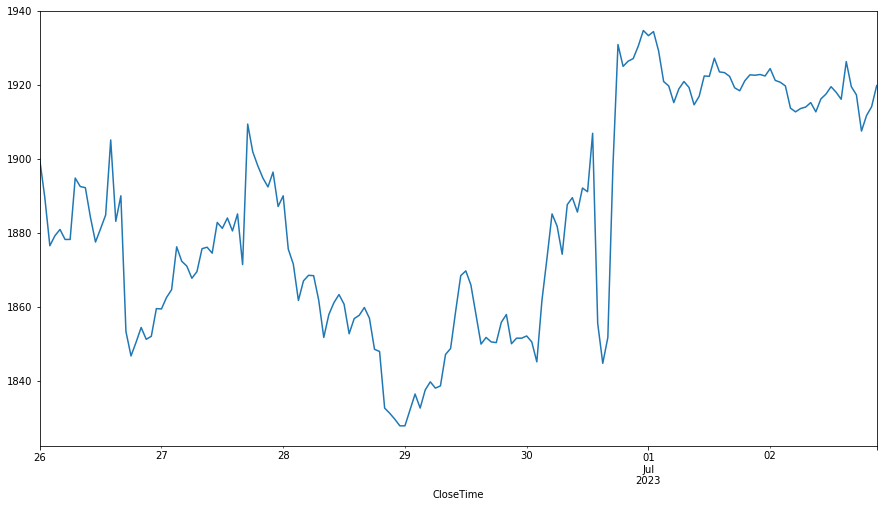

In [13]:
btc['ClosePrice'].plot(figsize = (15, 8))

In [17]:
eth.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,166.000000,166.000000,166.000000,166.000000,166.000000,1.660000e+02
mean,1883.657831,1889.257831,1877.611446,1883.761446,204.970250,3.862841e+05
std,30.102987,29.764331,30.504212,30.075107,319.901497,6.023548e+05
min,1827.800000,1833.600000,1816.500000,1827.800000,12.388000,2.369392e+04
25%,1857.625000,1863.075000,1850.475000,1857.900000,52.155530,9.960718e+04
50%,1881.600000,1889.500000,1874.200000,1881.150000,96.596795,1.851741e+05
75%,1915.150000,1918.800000,1912.125000,1915.200000,208.842163,3.875259e+05
max,1934.900000,1945.500000,1930.900000,1934.700000,2291.847102,4.326788e+06


In [14]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-06-26 00:00:00,1900.7,1903.0,1898.2,1899.9,58.195463,1.105940e+05
2023-06-26 01:00:00,1899.9,1905.1,1889.6,1889.6,129.824401,2.464310e+05
2023-06-26 02:00:00,1889.0,1889.0,1866.3,1876.5,589.188872,1.105904e+06
2023-06-26 03:00:00,1876.3,1879.7,1872.5,1879.2,188.799185,3.540975e+05
2023-06-26 04:00:00,1879.0,1881.6,1875.3,1880.9,108.886935,2.045277e+05


<AxesSubplot:xlabel='CloseTime'>

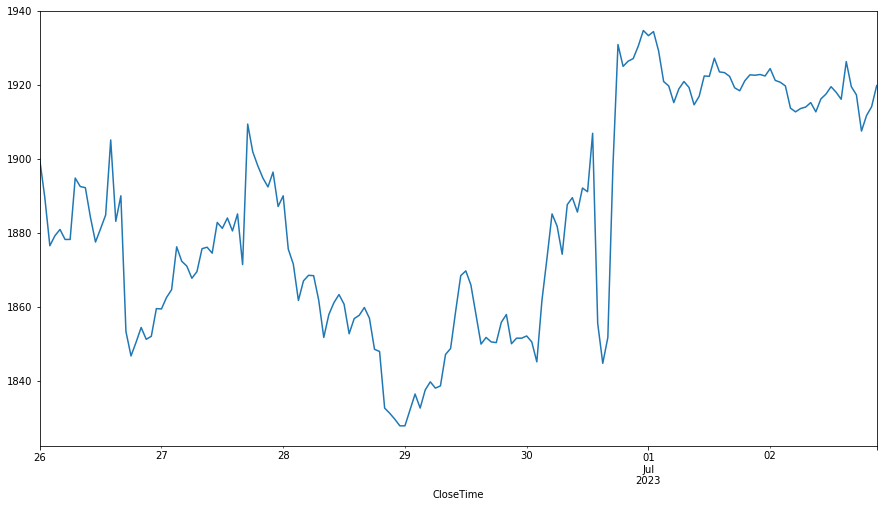

In [15]:
eth['ClosePrice'].plot(figsize = (15, 8))

In [19]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [20]:
output_notebook()

Loading BokehJS ...

In [25]:
p1 = figure(x_axis_type = "datetime", title = "Crypto Prices", width = 800)
p1.grid.grid_line_alpha = 0.3
p1.xaxis.axis_label = "Date"
p1.yaxis.axis_label = "Price"

p1.line(btc.index, btc['ClosePrice'], color = '#f2a900', legend = 'Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color = '#000', legend = 'Ethernet')

p1.legend.location = 'top_left'
show(p1)

In [26]:
writer = pd.ExcelWriter('CrptoCurrency.xlsx')

In [27]:
btc.to_excel(writer, sheet_name = 'Bitcoin')

In [28]:
eth.to_excel(writer, sheet_name = 'Ether')

In [30]:
writer.save()